# Mosaic image data products

Now that we have some/the images (CTX, Hirise, HRSC) reduced (as GeoTIFF) we want to create mosaics.

In [1]:
import geopandas
import pandas
pandas.set_option('display.max_columns',100)

## CTX

In [2]:
reduced_products = 'Mawrth_Vallis_reduced_sample_products_ctx.geojson'

gdf = geopandas.read_file(reduced_products)
gdf = gdf.loc[gdf.area.sort_values(ascending=False).index]

gdf

/var/folders/b1/frq3gywj3ljfqrf1yc7zk06r0000gn/T/ipykernel_46723/994023424.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf = gdf.loc[gdf.area.sort_values(ascending=False).index]


,Center_latitude,Center_longitude,Easternmost_longitude,Emission_angle,Footprints_cross_meridian,Incidence_angle,Map_scale,Maximum_latitude,Minimum_latitude,Observation_time,Phase_angle,Product_creation_time,Solar_longitude,Target_name,UTC_start_time,UTC_stop_time,Westernmost_longitude,browse_url,datasetId,id,idFromProvider,image_kbytes,image_path,inst,instrumentHostName,instrumentId,instrumentName,label_path,mission,missionPhaseName,observationMode,productCreationTime,spacecraftId,startTime,stopTime,targetName,type,tiff_path,geometry
1,24.3758,342.2817,342.87,0.09,False,59.39,5.66,27.0054,21.7462,2007-02-18T05:52:00.318000,59.41,2007-08-09T21:43:46,185.96,MARS,2007-02-18T05:51:11.313000,2007-02-18T05:52:49.324001,341.66,None,MRO_CTX,P04_002641_2046_XN_24N017W,P04_002641_2046_XN_24N017W,252001,data/ctx/P04_002641_2046_XN_24N017W.IMG,CTX,MARS RECONNAISSANCE ORBITER,CTX,CONTEXT CAMERA,data/ctx/P04_002641_2046_XN_24N017W.lbl,MRO,PSP,EDR,2007-08-09T21:43:46,MRO,2007-02-18T05:51:11.313000,2007-02-18T05:52:49.324001,MARS,EDR,data/reduced/ctx/P04_002641_2046_XN_24N017W.tif,"POLYGON ((-17.80000 27.00540, -17.13000 21.805..."
0,23.2688,342.4958,342.8,5.85,False,48.88,5.66,23.6504,22.8866,2006-11-12T15:12:52.777000,43.11,2007-05-18T22:07:23,134.36,MARS,2006-11-12T15:12:46.050999,2006-11-12T15:12:59.504002,342.19,None,MRO_CTX,P01_001388_2034_XI_23N017W,P01_001388_2034_XI_23N017W,35001,data/ctx/P01_001388_2034_XI_23N017W.IMG,CTX,MARS RECONNAISSANCE ORBITER,CTX,CONTEXT CAMERA,data/ctx/P01_001388_2034_XI_23N017W.lbl,MRO,PSP,EDR,2007-05-18T22:07:23,MRO,2006-11-12T15:12:46.050999,2006-11-12T15:12:59.504002,MARS,EDR,data/reduced/ctx/P01_001388_2034_XI_23N017W.tif,"POLYGON ((-17.29000 23.65040, -17.20000 22.936..."


<AxesSubplot:>

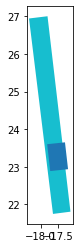

In [3]:
gdf.plot(column='id')

# What about the data?

Let's look into what those rasters and their metadata bring to us.

In [4]:
import npt
from npt.pipelines import mosaic
npt.log.set_level('DEBUG')

In [5]:
import json
gjson_ctx = json.loads(gdf.to_json())

In [6]:
mosaic(gjson_ctx, basepath='data/mosaic/ctx', method='fast', scale_factor=0.1)

INFO:__init__.mosaic(): 2 features read
DEBUG:__init__.mosaic(): Sources: ['data/reduced/ctx/P04_002641_2046_XN_24N017W.tif', 'data/reduced/ctx/P01_001388_2034_XI_23N017W.tif']
DEBUG:__init__._mosaic(): Rescaled filename to-write: data/mosaic/ctx/P04_002641_2046_XN_24N017W.rescaled01.tif
DEBUG:__init__._mosaic(): Rescaled filename to-write: data/mosaic/ctx/P01_001388_2034_XI_23N017W.rescaled01.tif
DEBUG:_xarray.merge(): Running 'merge', from npt.utils._xarray


,Footprints_cross_meridian,Map_scale,Target_name,browse_url,datasetId,inst,instrumentHostName,instrumentId,instrumentName,mission,missionPhaseName,observationMode,spacecraftId,targetName,type,id_sources,geometry,tiff_kbytes,tiff_path
0,False,5.66,MARS,None,MRO_CTX,CTX,MARS RECONNAISSANCE ORBITER,CTX,CONTEXT CAMERA,MRO,PSP,EDR,MRO,MARS,EDR,"P04_002641_2046_XN_24N017W,P01_001388_2034_XI_...","POLYGON ((-17.20000 22.93620, -17.27475 22.929...",23486,data/mosaic/ctx/mosaic_ctx_20220414T0006266466...


In [7]:
mosaic(gjson_ctx, basepath='data/mosaic/ctx', method='all', scale_factor=0.1)

INFO:__init__.mosaic(): 2 features read
DEBUG:__init__.mosaic(): Sources: ['data/reduced/ctx/P04_002641_2046_XN_24N017W.tif', 'data/reduced/ctx/P01_001388_2034_XI_23N017W.tif']
DEBUG:__init__._mosaic(): Rescaled filename to-write: data/mosaic/ctx/P04_002641_2046_XN_24N017W.rescaled01.tif
DEBUG:__init__._mosaic(): Rescaled filename to-write: data/mosaic/ctx/P01_001388_2034_XI_23N017W.rescaled01.tif
DEBUG:_xarray.merge(): Running 'merge', from npt.utils._xarray
/opt/miniconda3/envs/npt/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/chbrandt/Coisas/repos/NEANIAS/npt/npt/utils/_xarray.py:77: RuntimeWarning: invalid value encountered in true_divide
  weights = (weights - weights.min())/(weights.max() - weights.min())
/opt/miniconda3/envs/npt/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, ax

,Footprints_cross_meridian,Map_scale,Target_name,browse_url,datasetId,inst,instrumentHostName,instrumentId,instrumentName,mission,missionPhaseName,observationMode,spacecraftId,targetName,type,id_sources,geometry,tiff_kbytes,tiff_path
0,False,5.66,MARS,None,MRO_CTX,CTX,MARS RECONNAISSANCE ORBITER,CTX,CONTEXT CAMERA,MRO,PSP,EDR,MRO,MARS,EDR,"P04_002641_2046_XN_24N017W,P01_001388_2034_XI_...","POLYGON ((-17.20000 22.93620, -17.27475 22.929...",23486,data/mosaic/ctx/mosaic_ctx_20220414T0007338449...


In [7]:
assert

SyntaxError: invalid syntax (2389114725.py, line 1)

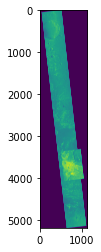

<AxesSubplot:>

In [12]:
import rioxarray
from rioxarray import merge
from rasterio.plot import show

items = ['data/reduced/ctx/P01_001388_2034_XI_23N017W.rescaled.tif',
         'data/reduced/ctx/P04_002641_2046_XN_24N017W.rescaled.tif']

elements = []

for val in items:
    elements.append(rioxarray.open_rasterio(val))

merged = merge.merge_arrays(elements, nodata=0.0)

image = merged.values
show(image)

In [ ]:
merged.rio.to_raster('data/mosaic/ctx/rioxarray.tif')

In [ ]:
_mask = None

def copy_mean(merged_data, new_data, merged_mask, new_mask, **kwargs):
    import numpy as np
    mask = np.empty_like(merged_mask, dtype="bool")
    np.logical_or(merged_mask, new_mask, out=mask)
    np.logical_not(mask, out=mask)
    
    #np.maximum(merged_data, new_data, out=merged_data, where=mask)
    _stack = np.stack([merged_data, new_data])
    # # np.mean(_stack, axis=0, out=merged_data)
    # _masked = np.ma.masked_where(mask, _stack)
    # _masked.mean(axis=0, out=merged_data)
    merged_data[mask] = np.mean(_stack, axis=0)[mask]
    global _mask
    if _mask is None:
        _mask = mask
    
    np.logical_not(new_mask, out=mask)
    np.logical_and(merged_mask, mask, out=mask)
    np.copyto(merged_data, new_data, where=mask, casting="unsafe")
    
merged = merge.merge_arrays(elements, method=copy_mean, nodata=0)
image = merged.values
show(image)

In [ ]:
merged.rio.to_raster('data/mosaic/ctx/rioxarray_mean.tif')

In [ ]:
_mask

In [ ]:
show(_mask)

In [ ]:
_mask.dtype

In [27]:
def plot_mask(_mask):
    import rasterio as rio
    from matplotlib import pyplot as plt

    fig, ax = plt.subplots(figsize=(5, 5))

    image_data = _mask[0]

    # use imshow so that we have something to map the colorbar to
    image_hidden = ax.imshow(image_data, 
                             cmap='Greys')
                          # vmin=-30, 
                          # vmax=30)

    # plot on the same axis with rio.plot.show
    image = rio.plot.show(image_data, 
                          # transform=src.transform, 
                          ax=ax, 
                          cmap='Greys') 
                          # vmin=-30, 
                          # vmax=30)

    # add colorbar using the now hidden image
    fig.colorbar(image_hidden, ax=ax)

In [ ]:
plot_mask(_mask)

In [ ]:
from scipy.ndimage import percentile_filter

weights = percentile_filter(_mask, 1, size=11, mode='constant', cval=1)

plot_mask(weights)

In [ ]:
weights

In [ ]:
_mask.shape

In [ ]:
from scipy.ndimage import uniform_filter, gaussian_filter

# weights = uniform_filter(_mask.astype(float), 55, mode='constant')
weights = gaussian_filter(_mask.astype(float), 55, mode='constant')
weights = (weights - weights.min())/(weights.max() - weights.min())

plot_mask(weights)

In [ ]:
_mask.shape

In [ ]:
weights.shape

In [ ]:
def copy_shadex(merged_data, new_data, merged_mask, new_mask, **kwargs):
    import numpy as np
    mask = np.empty_like(merged_mask, dtype="bool")
    np.logical_or(merged_mask, new_mask, out=mask)
    np.logical_not(mask, out=mask)
    
    _stack = np.stack([merged_data, new_data])
    merged_data[mask] = np.mean(_stack, axis=0)[mask]

    weights = gaussian_filter(mask.astype(float), 155, mode='constant')
    weights = (weights - weights.min())/(weights.max() - weights.min())
    merged_data[mask] = (merged_data * (1 - weights) + new_data * weights)[mask]
    
    np.logical_not(new_mask, out=mask)
    np.logical_and(merged_mask, mask, out=mask)
    np.copyto(merged_data, new_data, where=mask, casting="unsafe")
    
merged = merge.merge_arrays(elements, method=copy_shadex, nodata=0)
image = merged.values
show(image)

In [ ]:
merged.rio.to_raster('data/mosaic/ctx/rioxarray_shade_O.tif')

(1, 759, 546)


/var/folders/b1/frq3gywj3ljfqrf1yc7zk06r0000gn/T/ipykernel_37180/3843724442.py:48: RuntimeWarning: invalid value encountered in true_divide
  weights = (weights - weights.min())/(weights.max() - weights.min())


(1, 5189, 1130)
(284977,)
284977
(284977,)


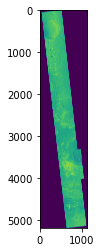

In [220]:
from rioxarray import merge

_masks = []
g_diff = None

def copy_diff(merged_data, new_data, merged_mask, new_mask, **kwargs):
    import numpy as np
    from scipy.ndimage import gaussian_filter

    mask = np.empty_like(merged_mask, dtype="bool")
    # First, we want to get the pixels in common to compute their diff/mapping
    np.logical_or(merged_mask, new_mask, out=mask)
    np.logical_not(mask, out=mask)

    _masks.append(merged_mask.copy())
    _masks.append(new_mask.copy())
    _masks.append(mask.copy())

    print(merged_data.shape)
    if mask.sum():
        n_merged_data = merged_data[mask]
        n_new_data = new_data[mask]
        print(n_merged_data.shape)
        print(mask.sum())
        print(n_new_data.shape)
        _mean = (n_merged_data - n_new_data).mean()
        new_data = new_data + _mean
#         _diff = np.zeros(n_new_data.shape)
#         _stack = np.concatenate([n_merged_data, n_new_data])
#         print(_stack.shape)
#         _diff[0,mask[0]] = np.diff(_stack, axis=0)[mask[0]]
#         _mean = np.mean(_diff)
#         # print(new_data[0,new_data.shape[1]//2,new_data.shape[2]//2])
#         # print(merged_data[0,merged_data.shape[1]//2,merged_data.shape[2]//2])
#         print(_mean)

#         # print(new_data.shape)
#         # print(mask.shape)
#         # print(_diff.shape)
#         # print(_mean.shape)
#         global g_diff
#         g_diff = _diff
    
    _stack = np.stack([merged_data, new_data])
    merged_data[mask] = np.mean(_stack, axis=0)[mask]

    weights = gaussian_filter(mask.astype(float), 155, mode='constant')
    weights = (weights - weights.min())/(weights.max() - weights.min())
    merged_data[mask] = (merged_data * (1 - weights) + new_data * weights)[mask]

    # new_data[mask] = new_data[mask] + _diff[mask]
    
    np.logical_not(new_mask, out=mask)
    np.logical_and(merged_mask, mask, out=mask)
    np.copyto(merged_data, new_data, where=mask, casting="unsafe")
    
merged = merge.merge_arrays(elements, method=copy_diff, nodata=0)
image = merged.values
show(image)

merged.rio.to_raster('data/mosaic/ctx/rioxarray_diff2.tif')

In [190]:
g_diff

masked_array(
  data=[[[-3.4028227e+38, -3.4028227e+38, -3.4028227e+38, ...,
          -3.4028227e+38, -3.4028227e+38, -3.4028227e+38],
         [-3.4028227e+38, -3.4028227e+38, -3.4028227e+38, ...,
          -3.4028227e+38, -3.4028227e+38, -3.4028227e+38],
         [-3.4028227e+38, -3.4028227e+38, -3.4028227e+38, ...,
          -3.4028227e+38, -3.4028227e+38, -3.4028227e+38],
         ...,
         [-3.4028227e+38, -3.4028227e+38, -3.4028227e+38, ...,
          -3.4028227e+38, -3.4028227e+38, -3.4028227e+38],
         [-3.4028227e+38, -3.4028227e+38, -3.4028227e+38, ...,
          -3.4028227e+38, -3.4028227e+38, -3.4028227e+38],
         [-3.4028227e+38, -3.4028227e+38, -3.4028227e+38, ...,
          -3.4028227e+38, -3.4028227e+38, -3.4028227e+38]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [193]:
g_diff.shape

(1, 5189, 1130)

(array([[5189.,    0.,    0., ...,    0.,    0.,    0.],
        [5189.,    0.,    0., ...,    0.,    0.,    0.],
        [5189.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [5189.,    0.,    0., ...,    0.,    0.,    0.],
        [5189.,    0.,    0., ...,    0.,    0.,    0.],
        [5189.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([-3.4028227e+38, -3.0625404e+38, -2.7222582e+38, -2.3819759e+38,
        -2.0416937e+38, -1.7014113e+38, -1.3611291e+38, -1.0208468e+38,
        -6.8056454e+37, -3.4028227e+37,  1.3455677e-01], dtype=float32),
 <a list of 1130 BarContainer objects>)

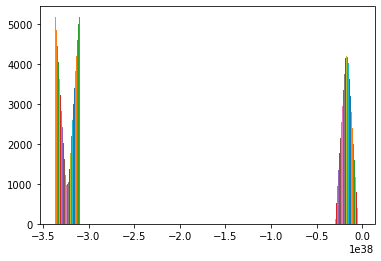

In [194]:
plt.hist(g_diff[0])

In [121]:
len(_masks)

3

In [123]:
_masks[0][0].shape

(759, 546)

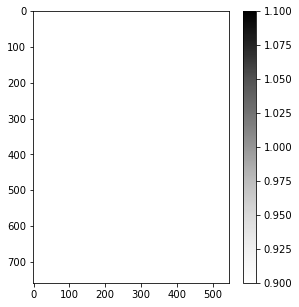

In [97]:
plot_mask(_masks[0])

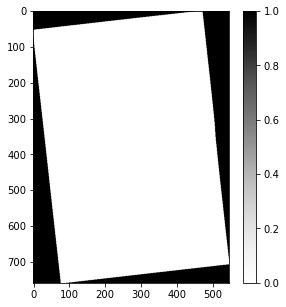

In [98]:
plot_mask(_masks[1])

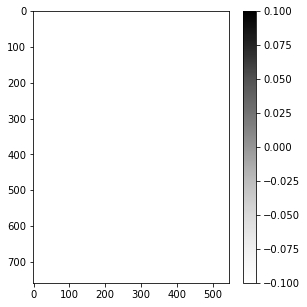

In [99]:
plot_mask(_masks[2])

In [100]:
_masks[2]

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

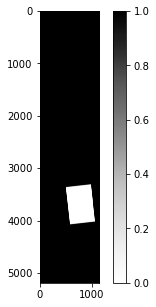

In [101]:
plot_mask(_masks[3])

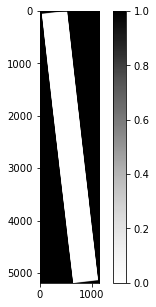

In [102]:
plot_mask(_masks[4])

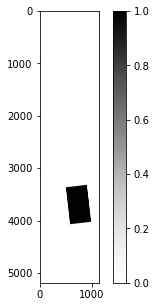

In [103]:
plot_mask(_masks[5])

In [146]:
import numpy as np
a1 = np.array([[[1,2,3,4],[1,2,3,4],[1,2,3,4]],
               [[11,12,13,14],[21,22,23,24],[31,32,33,34]]])
a1

array([[[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 1,  2,  3,  4]],

       [[11, 12, 13, 14],
        [21, 22, 23, 24],
        [31, 32, 33, 34]]])

In [147]:
a1.shape

(2, 3, 4)

In [157]:
b1 = np.zeros((1, *a1.shape[1:]))
b1

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [162]:
b1[0,mask]

array([0., 0., 0.])

In [170]:
np.diff(a1,axis=0)[0,mask]

array([10, 20, 30])

In [160]:
mask

array([[ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False]])

In [166]:
mask = np.array([[True,False,False,False],[True,False,False,False],[True,False,False,False]], bool)
b1[mask] = np.diff(a1,axis=0)[mask]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 3

In [164]:
b1

array([[[10.,  0.,  0.,  0.],
        [20.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.]]])

In [137]:
np.array([[True,False,False,True],[True,False,False,True],[True,False,False,True]])

array([[ True, False, False,  True],
       [ True, False, False,  True],
       [ True, False, False,  True]])

In [139]:
# np.diff(a1,axis=0)[0][
#     np.array([[0,1],[0,1]])
# ]
a1[...,
np.array([[True,False,False,True],[True,False,False,True],[True,False,False,True]])
]

array([[1, 4, 1, 4, 1, 4],
       [1, 4, 1, 4, 1, 4]])

In [128]:
np.diff(a1,axis=0)[0].shape

(3, 4)

In [126]:
np.array([[0,1],[0,1]]).shape

(2, 2)

In [120]:
np.diff(a1,axis=0).shape

(1, 3, 4)

In [221]:
mask

array([[ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False]])

In [222]:
_mask

NameError: name '_mask' is not defined

In [223]:
mask = _masks[0]

In [224]:
mask

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])

In [225]:
mask.shape

(1, 759, 546)

In [233]:
min(mask.shape[1:])//3

182